In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
netflix = pd.read_csv('NFLX_data.csv')


In [3]:
data = { 'Date': netflix['Date'],
         'netflix': netflix['Close']
         }
data = pd.DataFrame(data)
data

,Date,amazon,equinix,fbook,netflix,nvidia
0,2012-08-13,232.44,229.41,21.60,8.56,14.81
1,2012-08-14,233.19,221.90,20.38,8.82,14.59
2,2012-08-15,237.42,217.10,21.20,9.04,14.48
3,2012-08-16,241.55,221.92,19.87,9.19,14.78
4,2012-08-17,241.17,216.86,19.05,9.10,14.65
5,2012-08-20,240.35,218.00,20.01,9.18,14.65
6,2012-08-21,239.45,223.60,19.16,9.37,14.61
7,2012-08-22,243.10,222.12,19.44,9.34,14.64
8,2012-08-23,241.20,225.80,19.44,9.15,14.30
9,2012-08-24,245.74,219.43,19.41,9.02,14.60


In [4]:
rev_mean = 170
rev_stdev = 20
iterations = 1000

In [5]:
rev = np.random.normal(rev_mean, rev_stdev, iterations)
rev

array([ 191.36256504,  175.58328295,  172.78137685,  189.27174284,
        167.66918122,  169.34288047,  152.15175708,  192.50443272,
        186.45825284,  173.87609488,  171.461761  ,  147.52245442,
        157.94931544,  221.40681573,  175.88323671,  139.8417339 ,
        149.44265582,  165.96413238,  186.95723463,  182.6298267 ,
        175.2662133 ,  176.23033544,  168.65155497,  144.806082  ,
        207.1776807 ,  163.63152347,  141.80916859,  151.01499058,
        128.33145878,  167.5644442 ,  190.01894166,  200.35796929,
        187.33103153,  149.45789181,  155.06681291,  189.86098081,
        138.65810829,  174.71417406,  153.49625659,  168.74838337,
        160.82822464,  179.03067129,  154.92565832,  151.93491163,
        200.42409648,  157.61500456,  169.2499809 ,  144.73031876,
        167.63258606,  159.45875733,  193.42549776,  170.61212111,
        140.16850105,  173.6139391 ,  170.52708957,  166.09623678,
        185.24422421,  175.65877724,  163.73922058,  170.62838

<function matplotlib.pyplot.show>

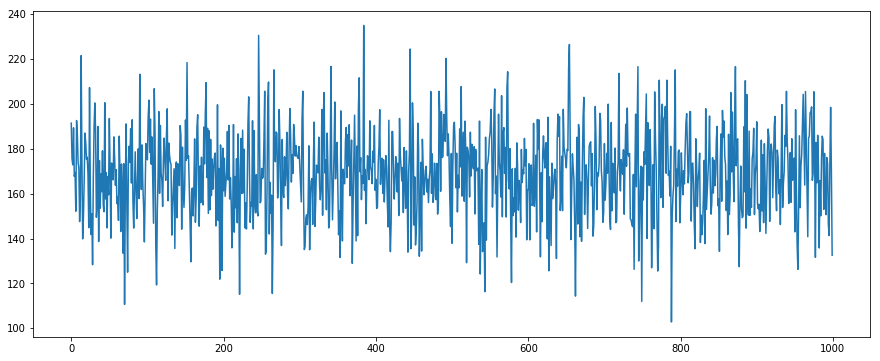

In [6]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show

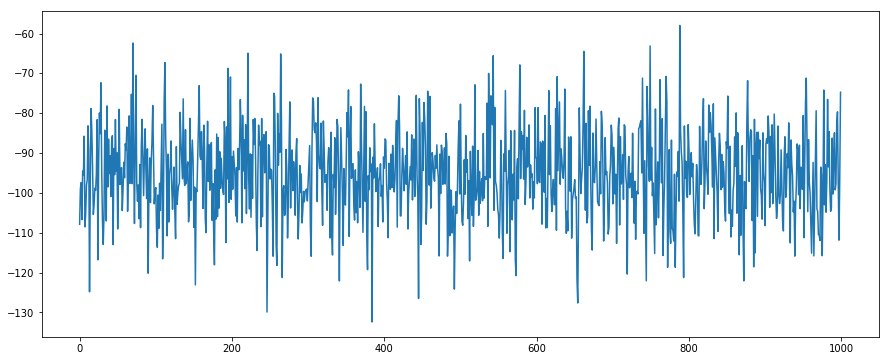

In [7]:
cogs = - (rev * np.random.normal(0.6,0.1))
plt.figure(figsize=(15,6))
plt.plot(cogs)
plt.show()

In [8]:
cogs.mean()

-95.244990856483611

In [9]:
cogs.std()

10.955973971786673

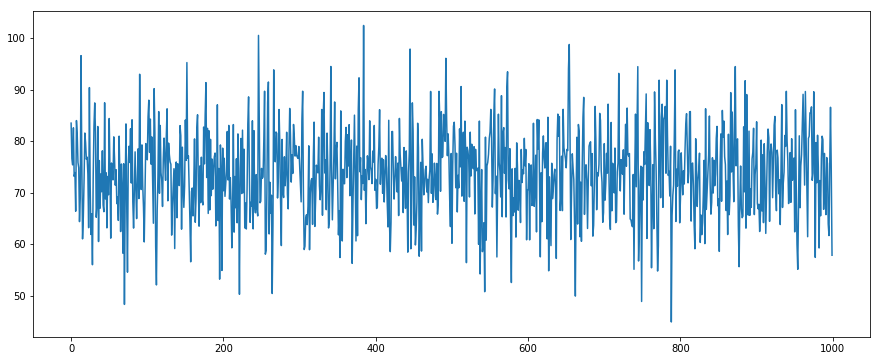

In [10]:
gross_prof = rev + cogs
gross_prof

plt.figure(figsize=(15,6))
plt.plot(gross_prof)
plt.show()

In [11]:
max(gross_prof)

102.45460417372752

In [12]:
min(gross_prof)

44.873930703497564

In [13]:
gross_prof.mean()

73.71462325317934

In [14]:
gross_prof.std()

8.4793487451620297

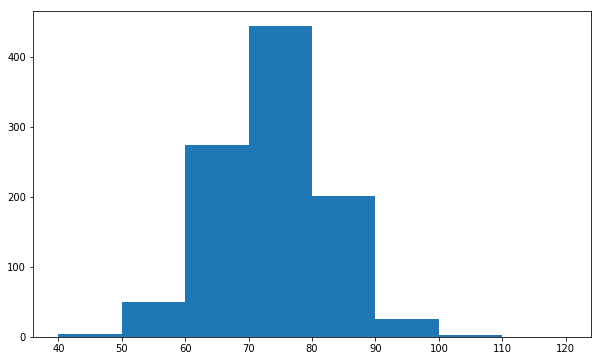

In [15]:
plt.figure(figsize=(10,6));
plt.hist(gross_prof, bins = [40,50,60,70,80,90,100,110,120]);
plt.show()

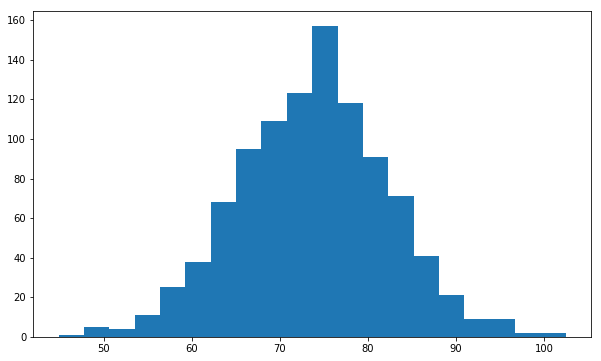

In [16]:
plt.figure(figsize=(10,6));
plt.hist(gross_prof, bins = 20 );
plt.show()

<b> Forecasting </b>

In [17]:
netflix['log_return']= np.log(netflix['Close']/netflix['Close'].shift(1)) 


In [18]:
netflix

,Date,Open,High,Low,Close,Volume,Name,log_return
0,2012-08-13,8.75,8.75,8.36,8.56,33334350,NFLX,NaN
1,2012-08-14,8.66,9.01,8.57,8.82,48125371,NFLX,0.029922
2,2012-08-15,8.86,9.10,8.83,9.04,30847810,NFLX,0.024637
3,2012-08-16,9.07,9.23,8.97,9.19,17640413,NFLX,0.016457
4,2012-08-17,9.27,9.36,9.07,9.10,22418914,NFLX,-0.009842
5,2012-08-20,9.09,9.34,8.88,9.18,26668194,NFLX,0.008753
6,2012-08-21,9.31,9.52,9.24,9.37,23370613,NFLX,0.020486
7,2012-08-22,9.30,9.49,9.26,9.34,18036900,NFLX,-0.003207
8,2012-08-23,9.43,9.49,9.08,9.15,32590236,NFLX,-0.020552
9,2012-08-24,9.01,9.11,8.84,9.02,26165559,NFLX,-0.014310


In [19]:
log_returns = np.log(1 + data.netflix.pct_change() )
log_returns

0            NaN
1       0.029922
2       0.024637
3       0.016457
4      -0.009842
5       0.008753
6       0.020486
7      -0.003207
8      -0.020552
9      -0.014310
10     -0.012270
11      0.008939
12      0.007756
13     -0.047467
14     -0.012813
15     -0.065399
16     -0.017677
17      0.030115
18      0.000000
19     -0.012438
20      0.022278
21      0.000000
22      0.014581
23      0.042509
24     -0.059541
25     -0.017327
26      0.017327
27      0.029023
28     -0.015616
29     -0.024511
          ...   
1228   -0.004541
1229   -0.021924
1230    0.009803
1231   -0.009256
1232    0.026517
1233    0.016444
1234    0.010814
1235    0.028237
1236   -0.003407
1237    0.018226
1238    0.003593
1239    0.127017
1240    0.001415
1241   -0.001415
1242    0.026551
1243   -0.003347
1244   -0.005015
1245    0.011222
1246   -0.034434
1247    0.007417
1248   -0.013016
1249    0.002035
1250   -0.007112
1251   -0.008390
1252    0.005786
1253    0.005863
1254   -0.016515
1255   -0.0145

In [20]:
log_returns.tail()

1253    0.005863
1254   -0.016515
1255   -0.014571
1256   -0.038506
1257    0.013273
Name: netflix, dtype: float64

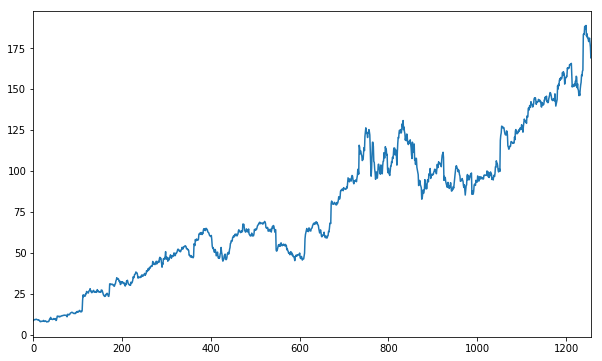

In [21]:
data.netflix.plot(figsize=(10,6));

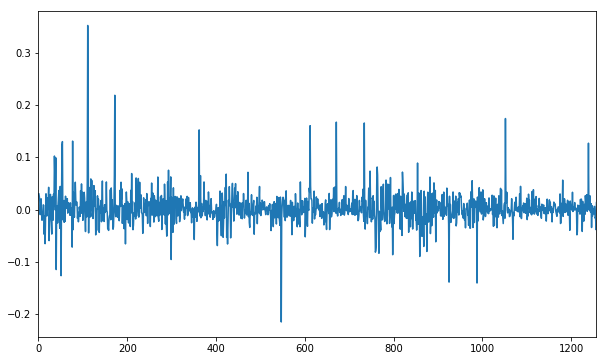

In [22]:
log_returns.plot(figsize = (10,6))

In [23]:
u = log_returns.mean()
u

0.0023841685091567414

In [24]:
var = log_returns.var()
var

0.0009405506296397565

In [25]:
# drift = aproximation of future rate of returns
drift = u - (0.5* var)
drift

0.001913893194336863

In [26]:
stdev = log_returns.std()
stdev

0.030668397898158235

In [27]:
type(drift)

float

In [28]:
type(stdev)

float

In [29]:
drift = pd.Series(drift)
stdev = pd.Series(stdev)

In [30]:
type(drift)

pandas.core.series.Series

In [31]:
np.array(drift)

array([ 0.00191389])

In [32]:
type(drift)

pandas.core.series.Series

In [33]:
drift.values

array([ 0.00191389])

In [34]:
stdev.values

array([ 0.0306684])

In [35]:
norm.ppf(0.95)

1.6448536269514722

In [36]:
x = np.random.rand(10,2)
x

array([[ 0.74028463,  0.9087879 ],
       [ 0.08039703,  0.03165815],
       [ 0.37299757,  0.11342844],
       [ 0.73147107,  0.34629389],
       [ 0.77333889,  0.68303138],
       [ 0.05885139,  0.55658928],
       [ 0.53557534,  0.43679938],
       [ 0.78282402,  0.3392367 ],
       [ 0.59860353,  0.49228809],
       [ 0.90415692,  0.03866759]])

In [37]:
norm.ppf(x)

array([[ 0.64422314,  1.33332797],
       [-1.40240592, -1.85696386],
       [-0.32392458, -1.2084951 ],
       [ 0.61726817, -0.39534569],
       [ 0.74988791,  0.47619251],
       [-1.56448901,  0.14232735],
       [ 0.08929267, -0.15908898],
       [ 0.78176625, -0.41454722],
       [ 0.24973416, -0.0193321 ],
       [ 1.30560721, -1.7663617 ]])

In [38]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.24425419, -0.30953084],
       [-0.01691549,  0.03414929],
       [ 0.05998639, -1.39166686],
       [ 0.12147424,  1.50060262],
       [ 0.35127966, -1.84128733],
       [ 0.08950698, -1.61437414],
       [-0.2268529 , -0.33524039],
       [ 0.65120965, -0.0260661 ],
       [ 0.08016583,  0.79019664],
       [-0.90818727, -0.2127338 ]])

In [48]:
t_intervals = 1000
iterations = 10

In [49]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations )))

In [50]:
daily_returns

array([[ 0.91789893,  1.01785511,  1.02235199, ...,  1.02136575,
         0.98463585,  1.02558397],
       [ 1.01292913,  0.98588092,  1.00445868, ...,  0.99581237,
         0.97292558,  1.03353988],
       [ 1.00976495,  1.03180516,  0.97535426, ...,  1.0028801 ,
         0.92958327,  0.96265015],
       ..., 
       [ 1.0463548 ,  0.99397619,  1.02368345, ...,  0.99587639,
         0.96827981,  0.98240374],
       [ 1.01470831,  1.06389362,  1.02969726, ...,  1.00797487,
         1.00434383,  0.92402808],
       [ 1.00391055,  0.98861613,  0.95162451, ...,  1.00173718,
         0.97074513,  1.00964228]])

In [51]:
s0 = data.netflix.iloc[-1]
s0

171.40000000000001

In [52]:
price_list = np.zeros_like(daily_returns)
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [53]:
price_list[0] = s0
price_list

array([[ 171.4,  171.4,  171.4, ...,  171.4,  171.4,  171.4],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       ..., 
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ]])

In [54]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [55]:
price_list

array([[  171.4       ,   171.4       ,   171.4       , ...,
          171.4       ,   171.4       ,   171.4       ],
       [  173.61605243,   168.97999025,   172.16421849, ...,
          170.68224014,   166.75944466,   177.1487359 ],
       [  175.31140454,   174.3544257 ,   167.92110353, ...,
          171.173822  ,   155.01679046,   170.53225798],
       ..., 
       [  965.69848589,  4351.18642939,   816.41621877, ...,
         2214.21093704,   509.14526731,   985.72542563],
       [  979.90228186,  4629.19947649,   840.66154158, ...,
         2231.86898548,   511.35690553,   910.83796867],
       [  983.73423465,  4576.50128659,   799.99412396, ...,
         2235.74615041,   496.39722372,   919.62052168]])

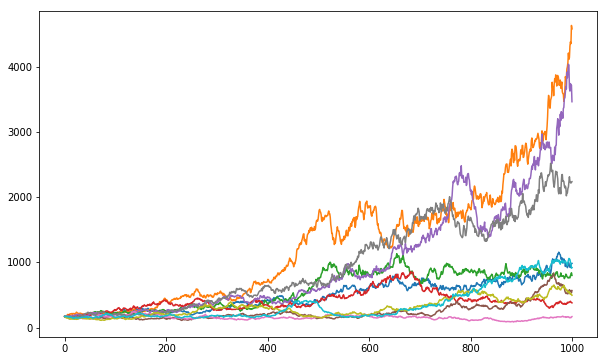

In [56]:
plt.figure(figsize=(10,6))
plt.plot(price_list);